## 1) Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Part 1: Data Visualization of the damaged car parts

# 2) Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd 

import os
for directoryname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(directoryname, filename))

In [3]:
pwd

'/content'

## 2.1) Download the git repository of cocoapi 

In [4]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-z9bsgdz1
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-z9bsgdz1
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263925 sha256=0d0a5830186b5f2a52931e278d55cd9af3afbd2b1645eda752b30d99c4ccc586
  Stored in directory: /tmp/pip-ephem-wheel-cache-y1w7o88m/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


## 2.2) Import the required visualization libraries 

In [5]:
%matplotlib inline 
# magic function that renders the figure in a notebook
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0) # Define the width, height of figure in inches
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

# 3) Define the dataset directories for validation images

In [6]:
data_directory='/content/drive/MyDrive/CarPartsDamageDetection/val'
data_type='COCO_val_annos'
multiple_data_types='COCO_mul_val_annos'
ann_file='{}/{}.json'.format(data_directory,data_type)
multiple_ann_files='{}/{}.json'.format(data_directory,multiple_data_types)
image_directory = '/content/drive/MyDrive/CarPartsDamageDetection/img'

# 4) Initialize coco api for instance annotations


In [7]:
coco=COCO(ann_file)
multiple_coco=COCO(multiple_ann_files)

loading annotations into memory...
Done (t=0.91s)
creating index...
index created!
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


# 5) Display categories and supercategories

#### 1) Single Class and Damage dataset

In [8]:
categories = coco.loadCats(coco.getCatIds())
names=[category['name'] for category in categories]
print('COCO categories for damages: \n{}\n'.format(', '.join(names)))

names = set([category['supercategory'] for category in categories])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(names)))

#Multi Class #Parts dataset
multiple_categories = multiple_coco.loadCats(multiple_coco.getCatIds())
multiple_names=[category['name'] for category in multiple_categories]
print('COCO categories for parts: \n{}\n'.format(', '.join(multiple_names)))

multiple_names = set([multiple_category['supercategory'] for multiple_category in multiple_categories])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(multiple_names)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



# 6) Find all images containing 'damage' categories and select one category at random


In [9]:
category_Ids = coco.getCatIds(catNms=['damage']);
image_Ids = coco.getImgIds(catIds=category_Ids );

In [10]:
print(category_Ids)

[1]


In [11]:
print(image_Ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### 6.1) Choosing one category at random

In [12]:
random_image_id = random.choice(image_Ids)
print(" Image Id = {} was selected at random from this {} list".format(random_image_id, image_Ids))

 Image Id = 5 was selected at random from this [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


# 7) Load the randomly selected image 

In [13]:
image_Id = coco.getImgIds(imgIds = [random_image_id])
image = coco.loadImgs(image_Id)[0]
print("Image details \n",image)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '42.jpg', 'flickr_url': '', 'height': 1024, 'id': 5, 'license': 1, 'width': 1024}


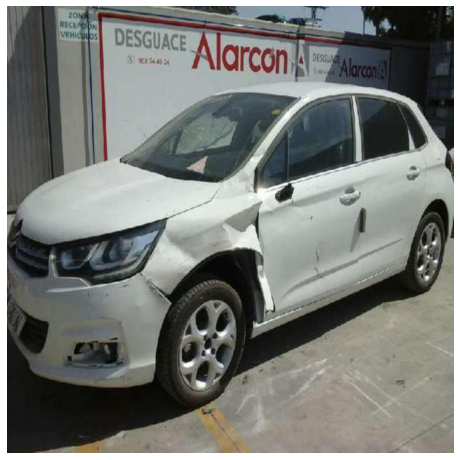

In [14]:
I = io.imread(image_directory + '/' + image['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

# 8) Obtain the damage annotations for that particular image

In [15]:
annotation_Ids = coco.getAnnIds(imgIds=image_Id,iscrowd=None)
annotation_files = coco.loadAnns(annotation_Ids)

In [16]:
print(annotation_Ids)

[11]


In [17]:
print(annotation_files)

[{'area': 37232.99999999999, 'bbox': [303, 445, 312, 279], 'category_id': 1, 'id': 11, 'image_id': 5, 'iscrowd': 0, 'segmentation': [[363, 507, 415, 528, 477, 500, 529, 470, 564, 455, 586, 445, 576, 473, 580, 503, 581, 543, 592, 579, 597, 618, 604, 646, 610, 676, 615, 694, 604, 707, 583, 724, 562, 717, 548, 673, 519, 643, 470, 619, 429, 633, 394, 660, 376, 675, 358, 668, 332, 647, 317, 625, 303, 601, 334, 550, 346, 525]]}]


# 9) Plot damages


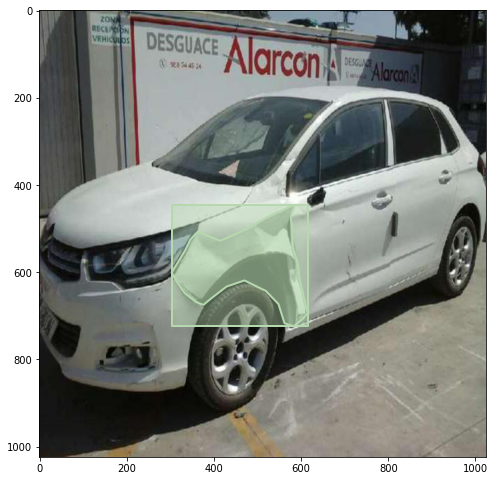

In [18]:
plt.imshow(I)
plt.axis('on')
coco.showAnns(annotation_files, draw_bbox=True )

# 10) Obtain the multiple damaged parts annotations


In [19]:
multiple_annotation_Ids = multiple_coco.getAnnIds(imgIds=image_Id,iscrowd=None)
multiple_annotation_files = multiple_coco.loadAnns(multiple_annotation_Ids)

In [20]:
print(multiple_annotation_Ids)

[18, 19, 20, 21]


In [21]:
print(multiple_annotation_files)

[{'area': 20475.000000000025, 'bbox': [107, 492, 257, 145], 'category_id': 1, 'id': 18, 'image_id': 5, 'iscrowd': 0, 'segmentation': [[130, 546, 364, 492, 364, 517, 304, 614, 245, 633, 191, 637, 170, 618, 116, 618, 107, 553]]}, {'area': 18629.999999999975, 'bbox': [3, 560, 373, 312], 'category_id': 5, 'id': 19, 'image_id': 5, 'iscrowd': 0, 'segmentation': [[3, 567, 51, 621, 92, 624, 96, 569, 103, 560, 108, 575, 115, 620, 173, 628, 192, 647, 307, 617, 376, 682, 350, 749, 338, 797, 338, 824, 334, 854, 291, 872, 153, 863, 57, 833, 41, 802, 5, 744]]}, {'area': 6785.99999999992, 'bbox': [576, 325, 384, 396], 'category_id': 3, 'id': 20, 'image_id': 5, 'iscrowd': 0, 'segmentation': [[576, 423, 576, 510, 588, 721, 920, 582, 950, 433, 960, 371, 940, 325, 718, 390, 648, 404, 660, 423, 651, 444, 622, 446, 611, 427, 648, 400, 606, 415]]}, {'area': 17374.000000000065, 'bbox': [15, 350, 476, 195], 'category_id': 4, 'id': 21, 'image_id': 5, 'iscrowd': 0, 'segmentation': [[18, 499, 43, 445, 104, 395, 

# 11) Create a dictionary between category_id and category name


In [22]:
category_map = dict()

for element in list(multiple_coco.cats.values()):
    category_map.update({element['id']:element['name']})

In [23]:
print(category_map)

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}


# 12) Create a list of parts in the image


Parts are: ['headlamp', 'front_bumper', 'door', 'hood']


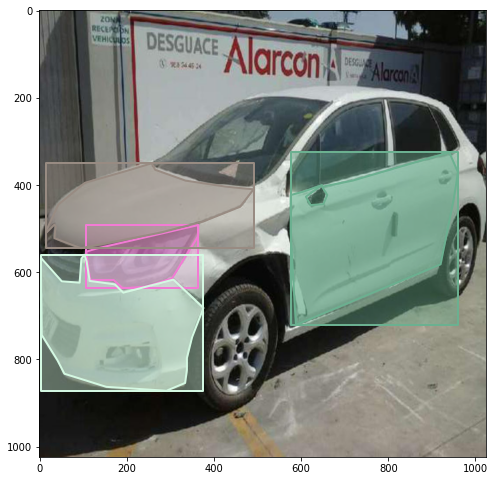

In [24]:
parts = []
for region in multiple_annotation_files:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(image_directory + '/' + image['file_name'])
plt.imshow(I)
plt.axis('on')
multiple_coco.showAnns(multiple_annotation_files, draw_bbox=True )

# Part 2: Detectron2 Car Damaged Parts Detection Model

# 13) Training Object detection model using Detectron 2

### 13.1) Install detectron 2


In [25]:
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 4.0 MB/s 
     |████████████████████████████████| 130 kB 4.2 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
     |████████████████████████████████| 145 kB 28.6 MB/s 
     |████████████████████████████████| 74 kB 3.9 MB/s 
     |████████████████████████████████| 743 kB 67.1 MB/s 
     |████████████████████████████████| 745 kB 61.7 MB/s 
     |████████████████████████████████| 636 kB 52.0 MB/s 
     |████████████████████████████████| 112 kB 72.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210825-py3-none-any.whl size=60661 sha256=a21116a62d3162abb85f0148026133de97f972771b40ea72fc287d75f6f2633a
  Stored in directory: /root/.cache/pip/wheels/53/c4/f8/c4cb07f135845218b019b4a55d8a0470a0f21ee13f8dcd16be
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=e5ee4

### 13.2) Import the libraries for torchvision, detectron2

In [26]:
!pip install torch==1.7.0

     |████████████████████████████████| 776.7 MB 4.2 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.


In [27]:
!pip install torchvision==0.8.1

     |████████████████████████████████| 12.7 MB 59 kB/s 
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


In [28]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0 True


## 13.3) Import the necessay libraries of detectron2

In [29]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

## 13.4) Checking for the correct versions of CUDA, detectron, PyTorch

In [30]:
!python -m detectron2.utils.collect_env

----------------------  ---------------------------------------------------------
sys.platform            linux
Python                  3.7.11 (default, Jul  3 2021, 18:01:19) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.5 @/usr/local/lib/python3.7/dist-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.2
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.0 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     True
GPU available           Yes
GPU 0                   Tesla T4 (arch=7.5)
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.8.1 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5
fvcore                  0.1.5.post20210825
iopath                  0.1.8
cv2                     4.1.2
----------------------  ----------------------------------------

# 14) Using Car Damaged Parts Dataset

In [31]:
dataset_directory = "/content/drive/MyDrive/CarPartsDamageDetection/"
image_directory = "/content/drive/MyDrive/CarPartsDamageDetection/img/"
train_directory = "/content/drive/MyDrive/CarPartsDamageDetection/train/"
validation_directory = "/content/drive/MyDrive/CarPartsDamageDetection/val/"

In [32]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, os.path.join(dataset_directory,train_directory,"COCO_train_annos.json"), os.path.join(dataset_directory,image_directory))
register_coco_instances("car_dataset_validation", {}, os.path.join(dataset_directory,validation_directory,"COCO_val_annos.json"), os.path.join(dataset_directory,image_directory))

In [33]:
print(register_coco_instances)

<function register_coco_instances at 0x7f34b7e75b00>


In [34]:
dataset_dictionaries = DatasetCatalog.get("car_dataset_train")
metadata_dictionaries = MetadataCatalog.get("car_dataset_train")

[09/08 09:54:14 d2.data.datasets.coco]: Loading /content/drive/MyDrive/CarPartsDamageDetection/train/COCO_train_annos.json takes 1.58 seconds.
[09/08 09:54:14 d2.data.datasets.coco]: Loaded 59 images in COCO format from /content/drive/MyDrive/CarPartsDamageDetection/train/COCO_train_annos.json


In [35]:
print(dataset_dictionaries)

[{'file_name': '/content/drive/MyDrive/CarPartsDamageDetection/img/10.jpg', 'height': 1024, 'width': 1024, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [300, 216, 79, 22], 'category_id': 0, 'segmentation': [[379, 216, 337, 218, 300, 223, 318, 238, 350, 237, 369, 231, 375, 227]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [226, 230, 62, 34], 'category_id': 0, 'segmentation': [[288, 230, 264, 238, 245, 249, 226, 264, 241, 264, 249, 253, 269, 253, 275, 250, 284, 238]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [161, 276, 65, 68], 'category_id': 0, 'segmentation': [[161, 331, 191, 326, 200, 276, 207, 315, 226, 322, 222, 337, 196, 344, 184, 342]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [254, 273, 67, 26], 'category_id': 0, 'segmentation': [[258, 273, 289, 273, 318, 275, 321, 289, 307, 299, 283, 296, 264, 291, 254, 285]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [233, 392, 123, 95], 'category_id': 0, 'segment

In [36]:
print(metadata_dictionaries)

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/CarPartsDamageDetection/img/', json_file='/content/drive/MyDrive/CarPartsDamageDetection/train/COCO_train_annos.json', name='car_dataset_train', thing_classes=['damage'], thing_dataset_id_to_contiguous_id={1: 0})


# 15) Training the model

### 15.1) To implement our own Training Module to be used for  the COCO validation evaluation during training


In [37]:
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [38]:
!pip show torchvision

Name: torchvision
Version: 0.8.1
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pillow, torch
Required-by: fastai


# 16) Running COCO-InstanceSegmentation algorithm on a MaskRCNN 

In [39]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_validation",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.WARMUP_ITERS = 700
cfg.SOLVER.MAX_ITER = 500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (600, 800)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (damage) + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 2 # only has one class (damage) + 1
cfg.TEST.EVAL_PERIOD = 600



# Clear any logs from previous runs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[09/08 09:54:20 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:17, 9.97MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

[09/08 09:54:40 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python

[09/08 09:54:56 d2.utils.events]:  eta: 0:05:35  iter: 19  total_loss: 2.255  loss_cls: 1.006  loss_box_reg: 0.3529  loss_mask: 0.6912  loss_rpn_cls: 0.1497  loss_rpn_loc: 0.02135  time: 0.7227  data_time: 0.1938  lr: 3.8962e-05  max_mem: 3183M
[09/08 09:55:09 d2.utils.events]:  eta: 0:05:08  iter: 39  total_loss: 1.947  loss_cls: 0.606  loss_box_reg: 0.3817  loss_mask: 0.6791  loss_rpn_cls: 0.1772  loss_rpn_loc: 0.02438  time: 0.6802  data_time: 0.0084  lr: 7.8922e-05  max_mem: 3183M
[09/08 09:55:22 d2.utils.events]:  eta: 0:04:56  iter: 59  total_loss: 1.564  loss_cls: 0.4283  loss_box_reg: 0.3868  loss_mask: 0.6489  loss_rpn_cls: 0.1088  loss_rpn_loc: 0.02316  time: 0.6758  data_time: 0.0086  lr: 0.00011888  max_mem: 3183M
[09/08 09:55:36 d2.utils.events]:  eta: 0:04:45  iter: 79  total_loss: 1.571  loss_cls: 0.3942  loss_box_reg: 0.4579  loss_mask: 0.6098  loss_rpn_cls: 0.06212  loss_rpn_loc: 0.01916  time: 0.6754  data_time: 0.0085  lr: 0.00015884  max_mem: 3183M
[09/08 09:55:49 d

# 17) Model Metrics and Hyper Parameters Visualization


In [40]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_validation = last * weight + (1 - weight) * point
        smoothed.append(smoothed_validation)
        last = smoothed_validation
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 1.0, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'
    
    plots = []
    
    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())
        
        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [41]:
plots = plot(logdir= './output', savedir= './')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

<Figure size 1152x648 with 0 Axes>

In [42]:
plots

['./seaborn/rpn/num_pos_anchors.png',
 './seaborn/rpn/num_neg_anchors.png',
 './seaborn/roi_head/num_fg_samples.png',
 './seaborn/roi_head/num_bg_samples.png',
 './seaborn/fast_rcnn/cls_accuracy.png',
 './seaborn/fast_rcnn/fg_cls_accuracy.png',
 './seaborn/fast_rcnn/false_negative.png',
 './seaborn/mask_rcnn/accuracy.png',
 './seaborn/mask_rcnn/false_positive.png',
 './seaborn/mask_rcnn/false_negative.png',
 './seaborn/data_time.png',
 './seaborn/total_loss.png',
 './seaborn/loss_cls.png',
 './seaborn/loss_box_reg.png',
 './seaborn/loss_mask.png',
 './seaborn/loss_rpn_cls.png',
 './seaborn/loss_rpn_loc.png',
 './seaborn/lr.png',
 './seaborn/time.png',
 './seaborn/eta_seconds.png',
 './seaborn/bbox/AP.png',
 './seaborn/bbox/AP50.png',
 './seaborn/bbox/AP75.png',
 './seaborn/bbox/APs.png',
 './seaborn/bbox/APm.png',
 './seaborn/bbox/APl.png',
 './seaborn/segm/AP.png',
 './seaborn/segm/AP50.png',
 './seaborn/segm/AP75.png',
 './seaborn/segm/APs.png',
 './seaborn/segm/APm.png',
 './seaborn

### 17.1) Plots for different model metrics

In [43]:
my_dpi = 1000
fig, ax = plt.subplots(2,1, figsize = (12,10), dpi=my_dpi)


ax[0].set_title('Total Loss', fontsize=12)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

ax[1].set_title('Class accuracy', fontsize=12)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

# ax[1].set_title('Bounding Box Average Precision', fontsize=8)
# ax[1].set_xticks([])
# ax[1].set_yticks([])
# ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

# ax[2].set_title('Segmentation Average Precision', fontsize=8)
# ax[2].set_xticks([])
# ax[2].set_yticks([])
# ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

# 18) Evaluate the Model

In [44]:
evaluator = COCOEvaluator("car_dataset_validation", cfg, False, output_dir="./output/")
validation_loader = build_detection_test_loader(cfg, "car_dataset_validation")
print(inference_on_dataset(trainer.model, validation_loader, evaluator))

WARNING [09/08 10:00:52 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[09/08 10:00:52 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/CarPartsDamageDetection/val/COCO_val_annos.json
[09/08 10:00:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/08 10:00:52 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[09/08 10:00:52 d2.data.common]: Serialized dataset takes 0.01 MiB
[09/08 10:00:52 d2.evaluation.evaluator]: Start inference on 11 batches
[09/08 10:00:54 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0008 s/iter. Inference: 0.0818 s/iter. Eval: 0.0309 s/iter. Total: 0.1135 s/iter. ETA=0:00:00
[09/08 10:00:54 d2.evaluation.evaluator]: Total inference time: 0:00:00.747695 (0.12461

# 19) Conclusions drawn from the car parts damage detection model

In [45]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_validation", )
predictor = DefaultPredictor(cfg)

In [46]:
valid_dataset_dictionaries = DatasetCatalog.get("car_dataset_validation")
valid_metadata_dictionaries = MetadataCatalog.get("car_dataset_validation")

[09/08 10:00:55 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/CarPartsDamageDetection/val/COCO_val_annos.json


In [47]:
print(valid_dataset_dictionaries)

[{'file_name': '/content/drive/MyDrive/CarPartsDamageDetection/img/1.jpg', 'height': 1024, 'width': 1024, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [364, 143, 190, 490], 'category_id': 0, 'segmentation': [[454, 143, 388, 296, 364, 424, 375, 505, 422, 597, 495, 633, 516, 577, 554, 489, 539, 349, 550, 259, 539, 210, 521, 166, 495, 150]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [391, 622, 172, 202], 'category_id': 0, 'segmentation': [[528, 622, 505, 675, 392, 675, 391, 712, 409, 778, 432, 824, 477, 822, 528, 785, 560, 729, 563, 688, 548, 662, 537, 647]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}, {'file_name': '/content/drive/MyDrive/CarPartsDamageDetection/img/22.jpg', 'height': 1024, 'width': 1024, 'image_id': 1, 'annotations': [{'iscrowd': 0, 'bbox': [626, 318, 179, 261], 'category_id': 0, 'segmentation': [[626, 326, 673, 318, 730, 337, 765, 370, 798, 406, 803, 440, 797, 466, 797, 491, 805, 522, 794, 579, 784, 543, 777, 505, 761, 468, 730, 423, 700, 388, 668

In [48]:
print(valid_metadata_dictionaries)

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/CarPartsDamageDetection/img/', json_file='/content/drive/MyDrive/CarPartsDamageDetection/val/COCO_val_annos.json', name='car_dataset_validation', thing_classes=['damage'], thing_dataset_id_to_contiguous_id={1: 0})


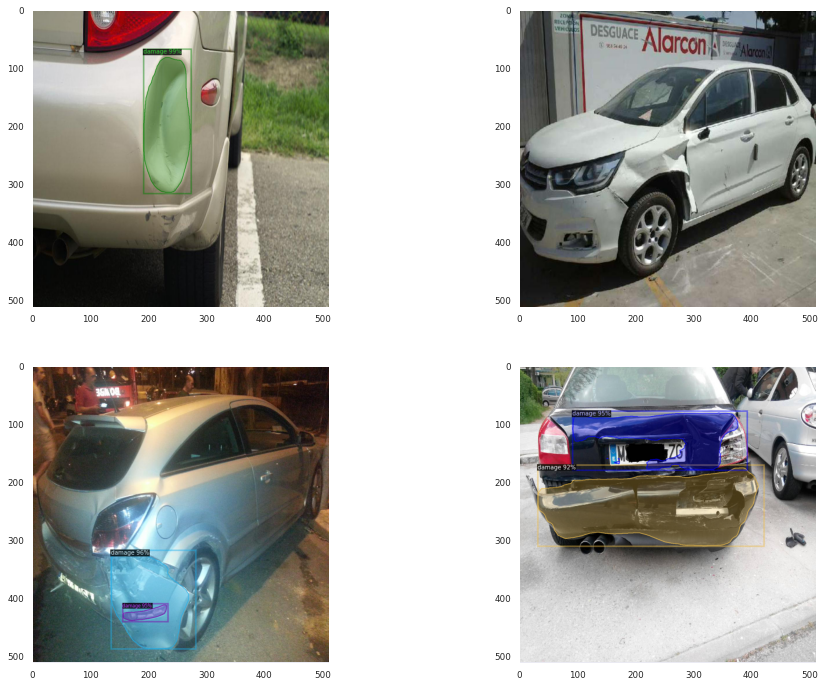

In [49]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(valid_dataset_dictionaries, 4):
    i=i+1    
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=valid_metadata_dictionaries, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])

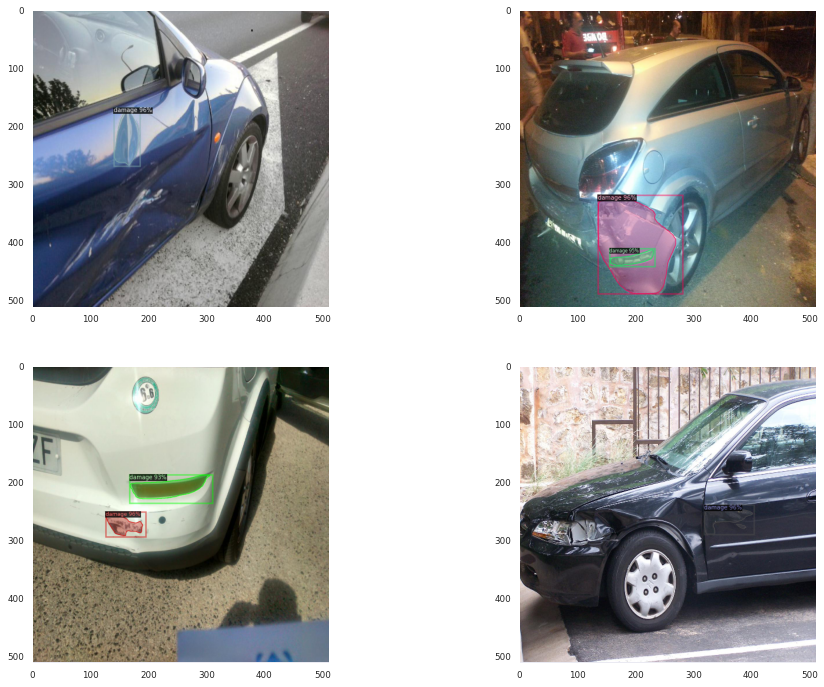

In [50]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(valid_dataset_dictionaries, 4):
    i=i+1    
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=valid_metadata_dictionaries, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])